**Hand Gesture Detection assignment**



   Instruction/Hints are mentioned, to run the cell you have to do shift+enter



In [1]:
%pip install opendatasets
%pip install keras
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all the necessary dependcies
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

2023-12-15 12:26:40.782805: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 12:26:40.815052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 12:26:40.815083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 12:26:40.815955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 12:26:40.821374: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 12:26:40.821771: I tensorflow/core/platform/cpu_feature_guard.cc:1

You will have to make an account on kaggle and will have to use that 'username' and key.

In [3]:
# Download the dataset from kaggle
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/koryakinp/fingers")

Skipping, found downloaded files in "./fingers" (use force=True to force download)


## Loading the Test, Train dataset

In [4]:
import os
import cv2
import numpy as np
# Path to the dataset directory
dataset_dir = './fingers/test'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):
    path = dataset_dir + '/'+filename
    # Load the image using OpenCV
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    # Resize the image to a desired size (e.g., 64x64)
    img_resize = cv2.resize(img, (64, 64))
    # Append the image to the images list
    images.append(img_resize)
    # Get the label from the filename (the first character)
    label = filename[-6]
    # Append the label to the labels list
    labels.append(label)



# Convert the lists to NumPy arrays
x_test = np.array(images)
y_test = np.array(labels)

In [5]:
dataset_dir = './fingers/train'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):
    path = dataset_dir + '/'+filename
    # Load the image using OpenCV
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    # Resize the image to a desired size (e.g., 64x64)
    img_resize = cv2.resize(img, (64, 64))
    # Append the image to the images list
    images.append(img_resize)
    # Get the label from the filename (the first character)
    label = filename[-6]
    # Append the label to the labels list
    labels.append(label)


# Convert the lists to NumPy arrays
x_train = np.array(images)
y_train = np.array(labels)

In [6]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [7]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes=6)
Y_test = to_categorical(y_test, num_classes=6)

In [8]:
print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (18000, 6)
Y_test shape: (3600, 6)


## Making CNN Model

In [9]:
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    ##  Apply RELU to previous layer
    A1 = tfl.Activation('relu')(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    ## RELU
    A2 = tfl.Activation('relu')(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    outputs = tfl.Dense(units=6, activation='softmax')(F)
    # return your model:
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [10]:
# COMPILE YOUR MODEL HERE

conv_model = convolutional_model((64, 64,1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         136       
                                                                 
 activation (Activation)     (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 activation_1 (Activation)   (None, 8, 8, 16)          0         
                                                             

2023-12-15 12:26:47.726472: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-15 12:26:47.726856: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
# SLICE THE DATASET FOR 1800 IMAGES FOR TRAINING AND 300 FOR TESTING, ALSO MENTION THE BATCH SIZE

train_dataset = tf.data.Dataset.from_tensor_slices((x_train[:1800], Y_train[:1800]))
train_dataset = train_dataset.batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test[:300], Y_test[:300]))
test_dataset = test_dataset.batch(32)


In [12]:
# TWEAK THE NUMBER OF IMAGES TO GET BETTER RESULTS
history = conv_model.fit(train_dataset, epochs=25, validation_data=test_dataset)

Epoch 1/25
57/57 [==============================] - 1s 15ms/step - loss: 12.1293 - accuracy: 0.2250 - val_loss: 3.1359 - val_accuracy: 0.2667
Epoch 2/25
57/57 [==============================] - 1s 14ms/step - loss: 2.1390 - accuracy: 0.3872 - val_loss: 1.4823 - val_accuracy: 0.4767
Epoch 3/25
57/57 [==============================] - 1s 12ms/step - loss: 1.2627 - accuracy: 0.5856 - val_loss: 0.9897 - val_accuracy: 0.6267
Epoch 4/25
57/57 [==============================] - 1s 12ms/step - loss: 0.9321 - accuracy: 0.6883 - val_loss: 0.7573 - val_accuracy: 0.7033
Epoch 5/25
57/57 [==============================] - 1s 14ms/step - loss: 0.7303 - accuracy: 0.7383 - val_loss: 0.6224 - val_accuracy: 0.7767
Epoch 6/25
57/57 [==============================] - 1s 13ms/step - loss: 0.5926 - accuracy: 0.7911 - val_loss: 0.5797 - val_accuracy: 0.8133
Epoch 7/25
57/57 [==============================] - 1s 13ms/step - loss: 0.4921 - accuracy: 0.8194 - val_loss: 0.5313 - val_accuracy: 0.8267
Epoch 8/25
5

PLOT YOUR RESULTS HERE


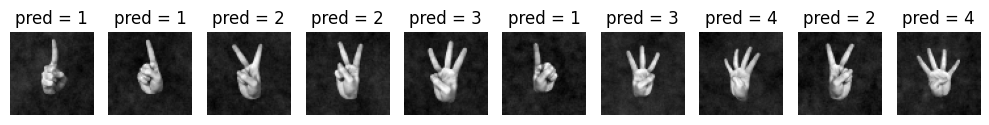

In [14]:
import random
import cv2
from matplotlib import pyplot as plt

numbers = list(range(1, 1001))
random_array = random.sample(numbers, 10)

fig = plt.figure(figsize=(10, 7))

for i, idx in enumerate(random_array):
    img_resized = cv2.resize(x_test[idx], (64, 64))
    y_pred = np.argmax(conv_model.predict(np.expand_dims(x_test[idx], axis=0),verbose=0))
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
    ax.set_title("pred = " + str(y_pred))

plt.tight_layout()
plt.show()